# Welcome to Machine Learning.

# "ISBE"  The Motto and Main Steps when building a Machine Learning Model. 
## 1. I - Inspect and explore data.
## 2. S - Select and engineer features.
## 3. B - Build and train model.
## 4. E - Evaluate model.

In [12]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline


# Helper function to split our data
from sklearn.model_selection import train_test_split

# This is our Logit model
from sklearn.linear_model import LogisticRegression

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

In [13]:
# Load data
df = pd.read_csv('data/titanic.csv')

# Display data
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data dictionary
<img src='https://miro.medium.com/max/1260/1*rr3UGlpEv_PSMc1pyqa4Uw.png'>


# Inspect and Explore EDA
1. Shape and size
1. Describe
1. Info
1. Check for nulls
1. Check for dupes
1. Plot

In [14]:
# 1. Shape and size
print(df.shape)

(891, 12)


In [15]:
# 2. Describe
df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
# 3. Get info on cols
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
passengerid    891 non-null int64
survived       891 non-null int64
name           891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
sex_1          891 non-null int64
sex_male       891 non-null uint8
pclass_2       891 non-null uint8
pclass_3       891 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


In [74]:
df = df[df['age'].notna()]

## Inspect null values.
* What does this tell us about features we should and should not use. 

In [75]:
# Inspect / check for nulls.
df.isnull().sum() 

passengerid      0
survived         0
name             0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          529
embarked         2
sex_1            0
sex_male         0
pclass_2         0
pclass_3         0
dtype: int64

In [27]:
# Percentage of null values per columns
((df.isnull().sum() / len(df)) * 100).round(2)

passengerid     0.00
survived        0.00
pclass          0.00
name            0.00
sex             0.00
age            19.87
sibsp           0.00
parch           0.00
ticket          0.00
fare            0.00
cabin          77.10
embarked        0.22
sex_1           0.00
dtype: float64

## Inspect duplicate rows.
* Phew...

In [19]:
n_dupes = df.duplicated().sum()
print("Number of duplicate rows are %i." % n_dupes)

Number of duplicate rows are 0.


# Visualize our data

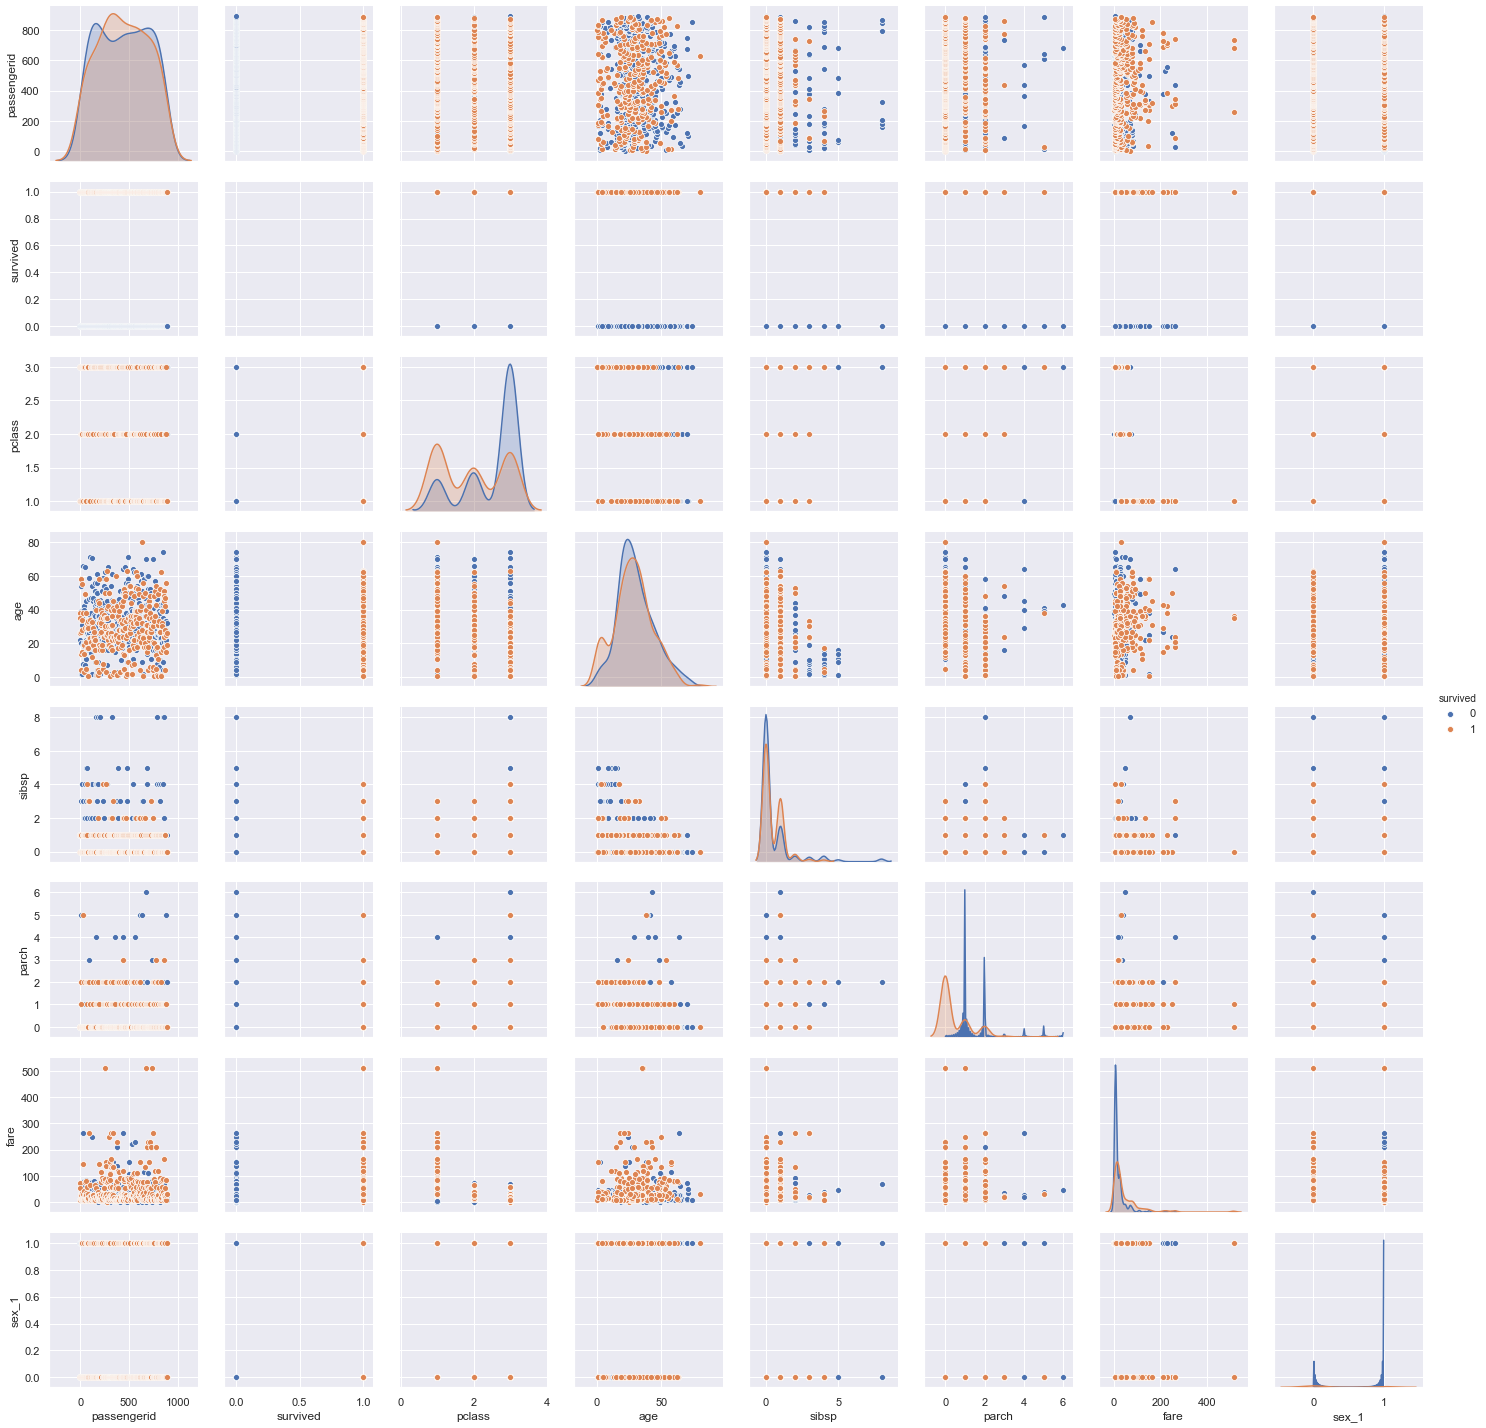

In [26]:
sns.pairplot(df, hue='survived');

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

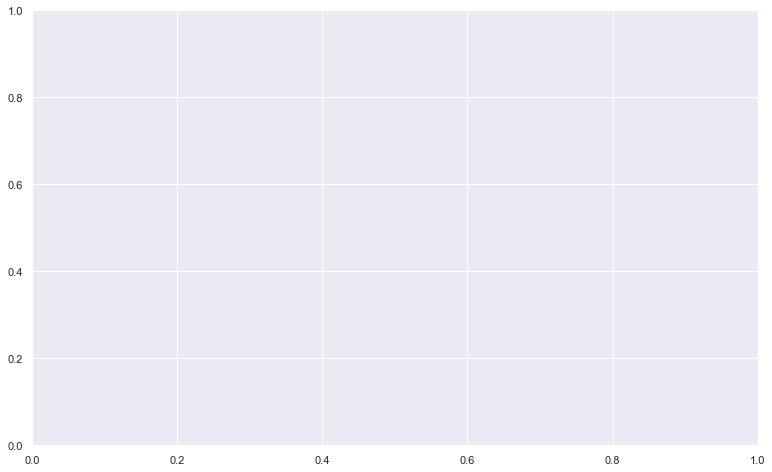

In [21]:
plt.figure(figsize=(13,8))
sns.kdeplot(data=df,x='age', hue='survived', shade=True)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

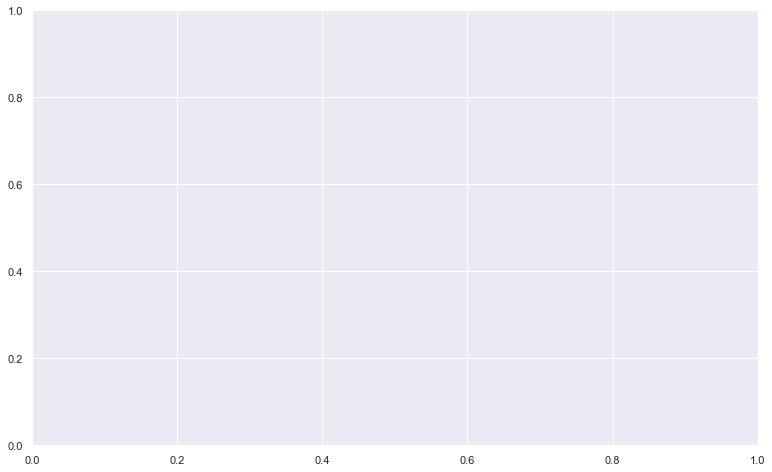

In [22]:
plt.figure(figsize=(13,8))
sns.kdeplot(data=df,x='age', hue='survived', shade=True)

In [23]:
df["sex_1"] = np.where(df['sex'] == 'male', 1, 0)

df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,sex_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [25]:

df.corr()

,passengerid,survived,pclass,age,sibsp,parch,fare,sex_1
passengerid,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939
survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
sibsp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
sex_1,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


# "S" Select and Engineer Features
1. Select the features you are going to want to use to predict survived. 
    * For this first example we are only going to be selecting `fare, sex, and pclass`
    * Don't use features that have nulls in them. 
1. Convert categorical variables into numerical. 
    * Use helper function `pd.get_dummies()` for this 
1. Split into test and train. 

In [12]:
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [14]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [15]:
df.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

### Convert categorical variables into numerical.
* `pd.get_dummies()` is a very helpful function that converts our categorical variables into continuous variables. 

In [28]:
df = pd.get_dummies(df, columns=['sex', 'pclass'], drop_first=True)
df.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_1,sex_male,pclass_2,pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,1,0,1


In [76]:
# selected_features = ['fare', 'pclass_2', 'pclass_3', 'sex_male']
selected_features = ['fare', 'age', 'sex_male']

In [71]:
df.dropna()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_1,sex_male,pclass_2,pclass_3
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0,0
6,7,0,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,1,1,0,0
10,11,1,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,S,0,0,0,1
11,12,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,S,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,D35,S,0,0,0,0
872,873,0,"Carlsson, Mr. Frans Olof",33.0,0,0,695,5.0000,B51 B53 B55,S,1,1,0,0
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C50,C,0,0,0,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,0,0,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
passengerid    891 non-null int64
survived       891 non-null int64
name           891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
sex_1          891 non-null int64
sex_male       891 non-null uint8
pclass_2       891 non-null uint8
pclass_3       891 non-null uint8
dtypes: float64(2), int64(5), object(4), uint8(3)
memory usage: 79.3+ KB


# Defining our X and y
### y is what we are trying to predict, and X is what we are using to make that prediction.
* It is industry standard to name your feature matrix as `X`, and your target variable as `y`


In [77]:
X = df[selected_features]

y = df['survived']

### Splitting our data into training and testing batches.


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', X_test.shape)

Lenght of our Training data: (571, 3) 
Length of our Testing data: (143, 3)


# "B" - Build and train our model
* Initalize an empty model
* Train our model using our `model.fit()` with our training data 

In [79]:
from sklearn.linear_model import LogisticRegression

# Initalize our model.  
# This will create an empty untrained Logistic Regression model.
model = LogisticRegression()

print(type(model))


<class 'sklearn.linear_model.logistic.LogisticRegression'>


# This is the heart of our ML process. 
This steps fits (aka trains) our model with our training data.

In [80]:
# !! THIS HAPPENS 'IN PLACE', MEANING IT DOESN'T RETURN ANYTHING !!
model.fit(X_train, y_train)

/Users/nenewang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# Make new predicitions
y_pred = model.predict(X_test)
y_pred

NotFittedError: This LogisticRegression instance is not fitted yet

In [56]:
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba.round(2)

array([0.87, 0.77, 0.59, 0.39, 0.77, 0.11, 0.22, 0.13, 0.86, 0.41, 0.11,
       0.89, 0.6 , 0.11, 0.89, 0.11, 0.11, 0.59, 0.6 , 0.24, 0.32, 0.22,
       0.23, 0.11, 0.87, 0.6 , 0.33, 0.59, 0.87, 0.23, 0.12, 0.11, 0.23,
       0.35, 0.11, 0.23, 0.11, 0.85, 0.89, 0.11, 0.22, 0.84, 0.78, 0.59,
       0.11, 0.12, 0.85, 0.11, 0.11, 0.34, 0.62, 0.11, 0.11, 0.77, 0.89,
       0.11, 0.6 , 0.11, 0.11, 0.62, 0.32, 0.13, 0.12, 0.87, 0.11, 0.11,
       0.35, 0.77, 0.11, 0.59, 0.23, 0.86, 0.11, 0.34, 0.85, 0.22, 0.87,
       0.59, 0.11, 0.22, 0.11, 0.11, 0.32, 0.22, 0.11, 0.59, 0.59, 0.11,
       0.32, 0.37, 0.12, 0.22, 0.11, 0.26, 0.12, 0.86, 0.59, 0.6 , 0.77,
       0.11, 0.77, 0.11, 0.92, 0.77, 0.11, 0.11, 0.11, 0.26, 0.39, 0.12,
       0.11, 0.93, 0.11, 0.4 , 0.11, 0.77, 0.11, 0.86, 0.6 , 0.11, 0.6 ,
       0.24, 0.86, 0.11, 0.77, 0.11, 0.22, 0.6 , 0.12, 0.6 , 0.88, 0.24,
       0.77, 0.78, 0.11, 0.59, 0.22, 0.77, 0.22, 0.37, 0.12, 0.61, 0.11,
       0.11, 0.43, 0.24, 0.11, 0.39, 0.11, 0.59, 0.

In [57]:
pred_df = pd.DataFrame.from_dict( {'y_true': y_test, 'y_pred': y_pred, 'probability': y_pred_proba} )
pred_df.head(20)

,y_true,y_pred,probability
310,1,1,0.868592
635,1,1,0.766722
44,1,1,0.592358
698,0,0,0.390874
750,1,1,0.773104
837,0,0,0.113271
144,0,0,0.223115
169,0,0,0.132021
166,1,1,0.856573
660,1,0,0.410570


# E = Evaluate our model.

# Accuracy, our first look.
Is the percent of predicitions we got correct.
Good for general scoring, but bad in terms of when classes are imbalanced. 

It is the count of all the predictions you got correct divided by the total number of predictions.
Aka, Percent of predictions we got correct.


Accuracy = (TP + TN) / (TP + TN + FP + FN)


In [50]:
# Helper fuctions to evaluate our model. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.776536


# Precision
Out of all the times the MODEL says 'yes' what was the precentage it was correct. 
* The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative. 
* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. 
* If you want to raise precision (ie; only say yes when you are absolutely sure), raise your classification threshold.

In [58]:
precision = precision_score(y_test, y_pred)
print("Precision Score: %f" % precision)
print("In other words, when the model predicts someone survived, it is correct %f of the time." % precision)

Precision Score: 0.764706
In other words, when the model predicts someone survived, it is correct 0.764706 of the time.


# Recall
Out of all the times the ACTUAL is 'yes', how many did you get correct.  

Having high recall is important when the cost of missing a True Positive is high.  

For example, if you're detecting cancer.  Saying, you don't have cancer when you really do is really bad. Therefore, if you're building a model to detect cancer, you should optimize for having high recall.  You can do that by lowering your classification threshold. 

* The recall is intuitively the ability of the classifier to find all the positive samples.
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. 
* if you want to raise recall, lower your classification threshold

In [59]:
recall = recall_score(y_test, y_pred)
print("Recall Score: %f" % recall)
print("In other words, it correctly identifies %f percent of all survivors" % recall)

Recall Score: 0.684211
In other words, it correctly identifies 0.684211 percent of all survivors


# F1 Score
The ‘harmonic mean’ of precision and recall. 

Good for an overall evaluation metric. 


The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. 


F1 = 2 * (precision * recall) / (precision + recall)




In [54]:
from sklearn.metrics import f1_score

# F1 Score
f1_score(y_test, y_pred)

0.7222222222222222

* Confustion Matrix
    * True Positive (TP) - When you say yes and actual is yes.
    * False Positive (FP) - When you say yes and actual is no.
    * False Negative (FN) - When you say no and actual is yes.
    * True Negative (TN) - When you say no and actual is no. 

The first term (True or False) is if the prediction was correct or not. True means correct, False means incorrect.
The second term (Positive or Negative) is what the classifier guessed.  Did it say it Yes, or did it say No. 

True Positive (TP): A true positive is an outcome where the model correctly predicts the positive class. When we say YES survived, actual is YES survived. Having a high True-Positive rate is GOOD.

True Negative (TN): A true negative is an outcome where the model correctly predicts the negative class.  When we say NO survived, actual is NO survived. Having a high true-negative rate is GOOD.

False Negative (FN):  A false negative is an outcome where the model incorrectly predicts the negative class. We say NO survived, actual is YES survived.
Having a high False-Negative rate is BAD.

False Positive (FP):  A false positive is an outcome where the model incorrectly predicts the positive class. We say YES survived, actual is NO survived.
Having a high False-Positive rate is BAD.




true-negitive: 87 
false-positive: 16 
false-negative: 24 
true-positive: 52


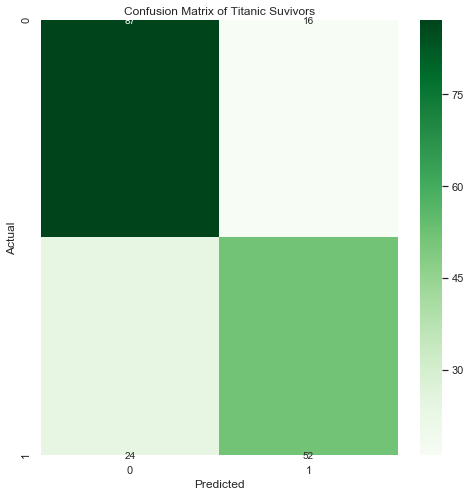

In [60]:

cm = confusion_matrix(y_test, y_pred)

# Just rounding them so the numbers are easier to read
cm = cm.round(2)


tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matrix of Titanic Suvivors")
plt.xlabel('Predicted')
plt.ylabel('Actual')

print('true-negitive:', tn, 
      '\nfalse-positive:', fp, 
      '\nfalse-negative:', fn, 
      '\ntrue-positive:', tp )

# Now onto the Exercise 